In [1]:
import pandas as pd
import numpy as np
from numpy import dot
from pandas import DataFrame, Series
from numpy.linalg import inv, solve
import matplotlib
from matplotlib import pyplot as plt

In [2]:
matplotlib.rcParams["font.size"] = 16

In [3]:
df = DataFrame({"c": [2, 4], "b": [5, 6]})
df

,c,b
0,2,5
1,4,6


# Matrix dot Vector

The dot product of A with x is dot(A, x).

Not the same as A * x.

The vector (when after the matrix) takes a combination of the columns.

In [4]:
dot(df, [1, 0])

array([2, 4])

In [5]:
dot(df, [0, 1])

array([5, 6])

In [6]:
dot(df, [1, -1])

array([-3, -2])

# Matrix dot Matrix

A matrix times a vector is a combination of the matrix's columns.

When we do A dot B, each column is taken as a vector, used to make a combination of A's columns, to create a column of output.

In [7]:
df = DataFrame({"c": [2, 4], "b": [5, 6]})
df

,c,b
0,2,5
1,4,6


In [8]:
df2 = DataFrame([[10, 2],
                 [1, 10]])
df2

,0,1
0,10,2
1,1,10


In [9]:
dot(df, df2)

array([[25, 54],
       [46, 68]])

In [10]:
# column 1
dot(df, df2[0])

array([25, 46])

In [11]:
# column 2
dot(df, df2[1])

array([54, 68])

# Identity and Inverse

An identity matrix is has 1's on the diagonal and 0's everywhere else.  Multiply another matrix with it and get the same matrix back.

In [12]:
df = DataFrame({"c": [2, 4], "b": [5, 6]})
df

,c,b
0,2,5
1,4,6


In [13]:
I = [[1, 0],
     [0, 1]]

In [14]:
dot(df, I)

array([[2, 5],
       [4, 6]])

Sometimes we want to find an inverse matrix $A^{-1}$ such that $AA^{-1} = I$.  Numpy's `inv` can help.

In [15]:
df_inv = inv(df)
df_inv

array([[-0.75 ,  0.625],
       [ 0.5  , -0.25 ]])

In [16]:
# does it work?
dot(df, df_inv)

array([[1., 0.],
       [0., 1.]])

# Solve for Slope+Intercept

In [17]:
df

,c,b
0,2,5
1,4,6


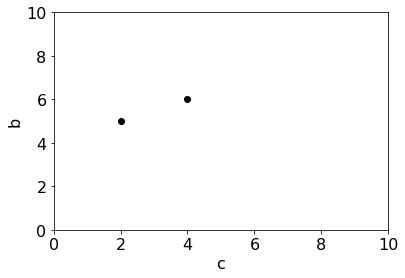

In [18]:
def plot_cb(c, b, color="black"):
    plt.scatter(x=c, y=b, c=color)
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xlabel("c")
    plt.ylabel("b")
    
plot_cb(df.c, df.b)

Say we want to find $x$ such that $b = cx_1 + 1x_2$

We have two equations and two unknows:
* $2x_1 + 1x_2 = 5$
* $4x_1 + 1x_2 = 6$

This becomes a standard $Ax = b$ problem (data determines A and b, and we want to solve for x, which captures the slope and intercept).

In [19]:
A = np.array([df.c, np.ones(len(df))]).T
A

array([[2., 1.],
       [4., 1.]])

In [20]:
b = df.b.values
b

array([5, 6])

In [21]:
x = solve(A, b)
x

array([0.5, 4. ])

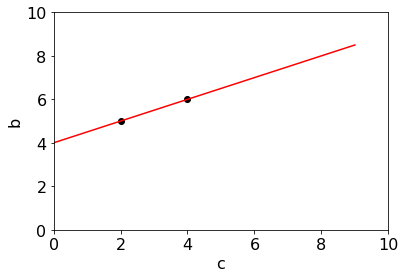

In [22]:
plot_cb(df.c, df.b)
c = np.arange(10)
plt.plot(c, c*x[0] + x[1], c="red")

# More Points

In [23]:
df = DataFrame({"c": [2, 4, 6], "b": [5, 6, 7]})
df

,c,b
0,2,5
1,4,6
2,6,7


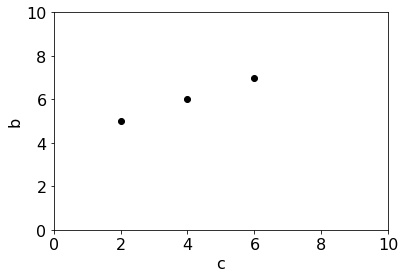

In [24]:
plot_cb(df.c, df.b)

In [25]:
A = np.array([df.c, np.ones(len(df))]).T
A

array([[2., 1.],
       [4., 1.],
       [6., 1.]])

In [26]:
b = df.b.values
b

array([5, 6, 7])

In [27]:
# problem 1: numpy wants it square
# x = solve(A, b)

In [28]:
# problem 2: there might not even be a solution!
df = DataFrame({"c": [2, 4, 8], "b": [5, 6, 7]})
df

,c,b
0,2,5
1,4,6
2,8,7


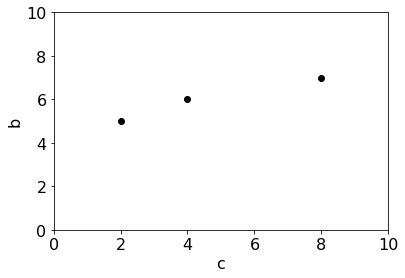

In [29]:
plot_cb(df.c, df.b)

In [30]:
A = np.array([df.c, np.ones(len(df))]).T
A

array([[2., 1.],
       [4., 1.],
       [8., 1.]])

In [31]:
b = df.b.values
b

array([5, 6, 7])

In [32]:
# when can we solve Ax = b?
# answer: when b is a combination of A's columns

# Projection Matrix

Define P as:

$P = A(A^TA)^{-1}A^T$

In a good linear algebra course, you would derive the above formula.  For now, it's probably worth memorizing.

P is a projection matrix.  Even if we there's not an answer for what x is in $Ax = b$, there will be an answer to $Ax = p$, where $p = Pb$.

Better still, p will be the closest possible to b ("closest" brings in least squares).

In [33]:
df = DataFrame({"c": [2, 4, 8], "b": [5, 6, 7]})
df

,c,b
0,2,5
1,4,6
2,8,7


In [34]:
P = dot(dot(A, inv(dot(A.T, A))), A.T)
P

array([[ 0.71428571,  0.42857143, -0.14285714],
       [ 0.42857143,  0.35714286,  0.21428571],
       [-0.14285714,  0.21428571,  0.92857143]])

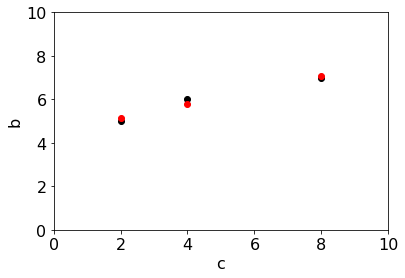

In [35]:
plot_cb(df.c, df.b)
plot_cb(df.c, dot(P, df.b), "red")

# Finding "best" x

1. $Ax = Pb$
2. $Ax = A(A^TA)^{-1}A^Tb$
3. $x = (A^TA)^{-1}A^Tb$
4. $(A^TA)x = A^Tb$

numpy can help now!

In [36]:
x = solve(dot(A.T, A), dot(A.T, b))
x

array([0.32142857, 4.5       ])

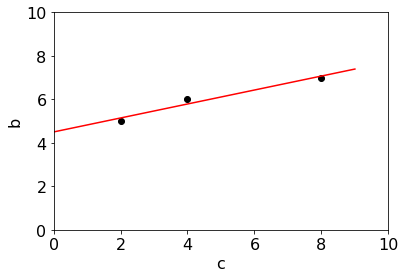

In [37]:
plot_cb(df.c, df.b)
cvals = np.arange(10)
plt.plot(cvals, cvals * x[0] + x[1], color="red")